In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [7]:
data = pd.DataFrame()
data['age'] = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
age = data['age']

weigth = 3
length = math.ceil(len(age)/weigth)
print('箱子宽度', length)
box1 = age[:length:]
box2 = age[length:2*length:]
box3 = age[2*length::]

print('分箱数据')
print('箱子1', box1)
print('箱子2', box2)
print('箱子3', box3)


avg_box1 = sum(box1)/len(box1)
avg_box2 = sum(box2)/len(box2)
avg_box3 = sum(box3)/len(box3)
print('箱子1均值', avg_box1)
print('箱子2均值', avg_box2)
print('箱子3均值', avg_box3)

box11 = [avg_box1 for _ in [0]* len(box1)]
box22 = [avg_box2 for _ in [0]* len(box2)]
box33 = [avg_box3 for _ in [0]* len(box3)]

print('均值光滑后')
print('箱子1', box11)
print('箱子2', box22)
print('箱子3', box33)
# print(data)

箱子宽度 9
分箱数据
箱子1 0    13
1    15
2    16
3    16
4    19
5    20
6    20
7    21
8    22
Name: age, dtype: int64
箱子2 9     22
10    25
11    25
12    25
13    25
14    30
15    33
16    33
17    35
Name: age, dtype: int64
箱子3 18    35
19    35
20    35
21    36
22    40
23    45
24    46
25    52
26    70
Name: age, dtype: int64
箱子1均值 18.0
箱子2均值 28.11111111111111
箱子3均值 43.77777777777778
均值光滑后
箱子1 [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
箱子2 [28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111]
箱子3 [43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778]


#### 下列规范化方法的值域是什么
- 最小-最大规范化

    [new_min, new_max]

- z分数规范化

    
- z分数规范化，使用均值绝对偏差
- 小数定标规范化


In [30]:
data = pd.DataFrame()
data['data'] = [200, 300, 400, 600, 1000]
# print(data['data'])
src = data['data']
print(src)
# 最大最小规范化
max_value = 1000
min_value = 200
new_max = 1
new_min = 0
print('max {0} min {1}'.format(max_value, min_value))
new_data = []
for i in range(len(src)):
    vi = (src[i]-min_value)/(max_value - min_value)*(new_max - new_min) + new_min
    new_data.append(vi)
print('最大最小规范化后的数据：{0}'.format(new_data))

# z分数规范化
avg_value = sum(src)/len(src)
sigma = math.sqrt((1/len(src)*sum(i**2 for i in src))**2-avg_value**2)
print('均值：{0}；标准差：{1}'.format(avg_value, sigma))
new_data.clear()
for i in range(len(src)):
    vi = (src[i] -avg_value)/sigma
    new_data.append(vi)
print('z分数规范化后的数据: {0}'.format(new_data))
# z分数规范化，均值绝对偏差
sA = 1/len(src)*sum(math.fabs(i - avg_value) for i in src)
new_data.clear()
for i in range(len(src)):
    vi = (src[i] -avg_value)/sA
    new_data.append(vi)
print('z分数规范化，绝对均值偏差：{0}'.format(new_data))
# 小数定标规范化

abs_max = 1000
j = 0
while abs_max >= 1:
    j+=1
    abs_max /= 10
    
print(j)

new_data.clear()
for i in range(len(src)):
    vi = src[i]/math.pow(10, j)
    new_data.append(vi)
print('小数定标规范化: {0}'.format(new_data))

0     200
1     300
2     400
3     600
4    1000
Name: data, dtype: int64
max 1000 min 200
最大最小规范化后的数据：[0.0, 0.125, 0.25, 0.5, 1.0]
均值：500.0；标准差：329999.6212119038
z分数规范化后的数据: [-0.0009090919525854848, -0.0006060613017236566, -0.0003030306508618283, 0.0003030306508618283, 0.0015151532543091412]
z分数规范化，绝对均值偏差：[-1.25, -0.8333333333333334, -0.4166666666666667, 0.4166666666666667, 2.0833333333333335]
4
小数定标规范化: [0.02, 0.03, 0.04, 0.06, 0.1]


In [32]:
data = 35
data1 = 0.0
data2 = 0.0
data3 = 0.35
print('最大最小规范化 {0}, z分数规范化 {1}, 小数定标规范化 {2}'.format(data1, data2, data3))

最大最小规范化 0.0, z分数规范化 0.0, 小数定标规范化 0.35


In [40]:
data = pd.DataFrame()
data['age'] = [23, 23, 27,27, 39, 41, 47, 49, 50, 52, 54, 54, 56, 57, 57, 58, 60, 61]
data['fat'] = [9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2,
              34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7]

age = data['age']
fat = data['fat']
# print(data)
# z分数规范化

length_age = len(age)
length_fat = len(fat)
avg_age = sum(age)/length_age
avg_fat = sum(fat)/length_fat
sigma_age = math.sqrt((1/length_age*sum(i**2 for i in age))**2-avg_age**2)
sigma_fat = math.sqrt((1/length_fat*sum(i**2 for i in fat))**2-avg_fat**2)
print('age 均值: {0} 标准差 {1}'.format(avg_age, sigma_age))
print('fat 均值: {0} 标准差 {1}'.format(avg_fat, sigma_fat))

new_age = []
new_fat = []
for i in age:
    vi = (i-avg_age)/sigma_age
    new_age.append(vi)
for i in fat:
    vi = (i- avg_fat)/sigma_fat
    new_fat.append(vi)
print('z分数规范后的数据')
print('age: {}'.format(new_age))
print('fat: {}'.format(new_fat))
    

age 均值: 46.388888888888886 标准差 2315.257541069995
fat 均值: 28.783333333333328 标准差 908.9104707063109
z分数规范后的数据
age: [-0.010102067901301262, -0.010102067901301262, -0.008374398331482518, -0.008374398331482518, -0.0031913896220262883, -0.002327554837116917, 0.0002639495176111983, 0.00112778430252057, 0.0015597016949752559, 0.0024235364798846273, 0.003287371264793999, 0.003287371264793999, 0.004151206049703371, 0.004583123442158056, 0.004583123442158056, 0.005015040834612743, 0.005878875619522115, 0.0063107930119768]
fat: [-0.02121587764122502, -0.0025121652868174776, -0.02308624887666577, -0.012084065138778983, 0.0028789047447470473, -0.0031722963110906864, -0.001521968750407668, -0.001742012425165403, 0.0026588610699893123, 0.006399603540870823, 0.015091328693801384, 1.8336972896484758e-05, 0.0050793414923244054, 0.0015586426962006337, 0.005849494353976484, 0.004529232305430066, 0.013661044807876105, 0.0076098437520383715]


In [47]:
box = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
weigth = 3
size_box = len(box)
print('原始箱子长度 {}'.format(size_box))
box1 = [box[:4:], box[4:8:], box[8::]]
print('等深分箱: {}'.format(box1))
box2 = [box[:4:], box[4:8:], box[8::]]
print('等频分箱: {}'.format(box1))


原始箱子长度 12
等深分箱: [[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]
等频分箱: [[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]


[{'cnt': 0, 'min': 0, 'max': 10}, {'cnt': 7, 'min': 10, 'max': 20}, {'cnt': 8, 'min': 20, 'max': 30}, {'cnt': 8, 'min': 30, 'max': 40}, {'cnt': 2, 'min': 40, 'max': 50}, {'cnt': 1, 'min': 50, 'max': 60}, {'cnt': 1, 'min': 60, 'max': 70}]


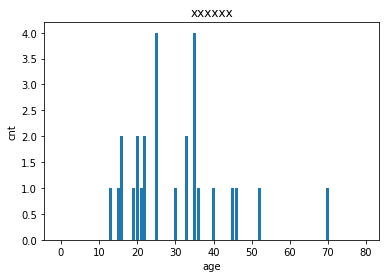

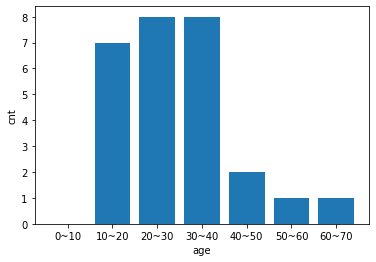

In [109]:
data = pd.DataFrame()
data['age'] = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
age = data['age']
max_value = 10
cnt1 = [0 for _ in range(80)]
for i in age:
    cnt1[i] += 1
    
cnt2 = [{'cnt': 0,'min':0, 'max':0} for _ in [0]*7]
for i in range(7):
#     cnt[i['cnt'] = 1
    cnt2[i]['max'] = i*10+10
    cnt2[i]['min'] = i*10
for i in age:
    for c in cnt2:
        if c['min'] <= i and i <= c['max']:
            c['cnt'] += 1
            break
# plt.subplot(211)
plt.figure(1)
plt.bar(range(0, 80), cnt1)
plt.xlabel('age')
plt.ylabel('cnt')
plt.title('xxxxxx')


plt.figure(2)
# plt.subplot(212)
print(cnt2)
x = ['{0}~{1}'.format(c['min'], c['max']) for c in cnt2]
y = [c['cnt'] for c in cnt2]
# print(x)
# print(y)
plt.bar(x, y)
plt.xlabel('age')
plt.ylabel('cnt')
plt.show()

